In [62]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings = warnings.filterwarnings('ignore')

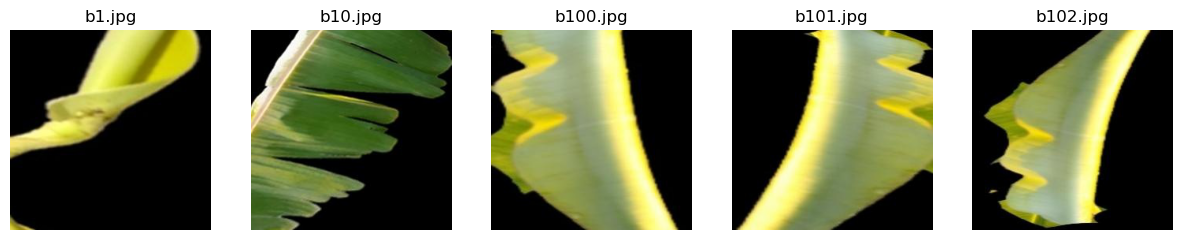

In [63]:
def display_sample_images(image_dir, num_samples=5):
    try:
        # Get list of image files in the directory
        files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
        
        if not files:
            print("No files found in the directory.")
            return
        
        # Filter out non-image files (optional: based on extension)
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
        image_files = [f for f in files if os.path.splitext(f)[1].lower() in image_extensions]

        if not image_files:
            print("No image files found in the directory.")
            return
        
        # Display a few sample images
        plt.figure(figsize=(15, 5))  # Adjust the size as needed
        for i, image_file in enumerate(image_files[:num_samples]):
            img_path = os.path.join(image_dir, image_file)
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(f"{os.path.basename(image_file)}")
            plt.axis('off')
        
        plt.show()
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Directory containing images
image_dir = r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\boron'

# Display sample images
display_sample_images(image_dir, num_samples=5)


Explanation
Setup Image Directories:

Dictionary image_dirs contains directory paths for each nutrient.
Create a Figure:

plt.figure(figsize=(15, 10)) sets the size of the figure to display multiple images.
Loop Through Directories:

Enumerate over image_dirs to get directory paths.
List files in each directory and select the first image file.
Display Images:

Use Image.open() to open the image and plt.imshow() to display it.
Use plt.subplot() to arrange images in a grid.
Show Plot:

plt.tight_layout() adjusts subplot parameters for better spacing.
plt.show() displays the images.

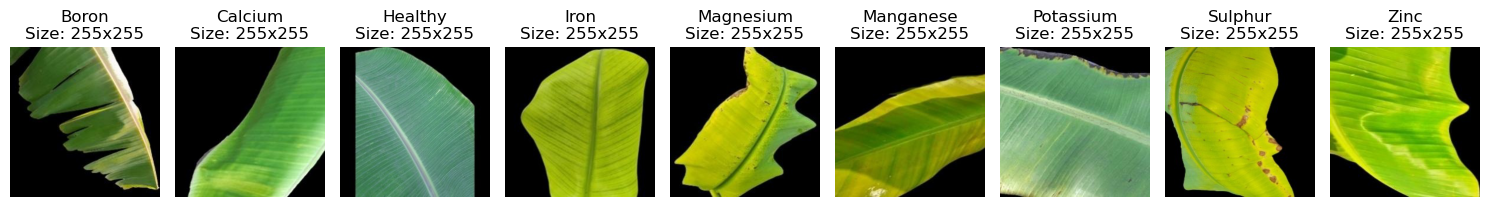

In [65]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# List of image directories
image_dirs = {
    'Boron': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\boron',
    'Calcium': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\calcium',
    'Healthy': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\healthy',
    'Iron': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\iron',
    'Magnesium': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\magnesium',
    'Manganese': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\manganese',
    'Potassium': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\potassium',
    'Sulphur': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\sulphur',
    'Zinc': r'C:\Users\MEMBER COMPUTER TECH\Crop Nutrients Deficiency Detection\Images of Nutrient Deficient Banana Plant Leaves\Augmented Images of Nutrient Deficient Banana leaves\zinc'
}

# Create a figure to display images
plt.figure(figsize=(15, 10))

# Display one sample image from each directory
for i, (nutrient, dir_path) in enumerate(image_dirs.items()):
    # List all files in the directory
    files = os.listdir(dir_path)
    
    # Select the first image file (adjust index as needed)
    if files:
        sample_image_path = os.path.join(dir_path, files[56])
        
        # Open and display the image
        img = Image.open(sample_image_path)
        width, height = img.size # display the size of an image
        plt.subplot(1, 9, i + 1)  # Adjust subplot grid size as needed(it used to set row and column)
        plt.imshow(img)
        plt.title(nutrient)
        plt.title(f"{nutrient}\nSize: {width}x{height}")
        plt.axis('off')
    else:
        print(f"No images found in directory: {dir_path}")

# Show the figure with all images
plt.tight_layout()
plt.show()


PREPROCESING THE DATA

In [67]:
# Define the target size for the images
target_size = (128, 128)

In [68]:
# Create a function to resize the image
def resize_image(image_path, target_size):
    with Image.open(image_path) as img:
        image_resized = img.resize(target_size)
    return image_resized

In [69]:
# Initialize lists to hold image data and labels
train_images = []
train_labels = []

# Load and process images
for label, dir_path in image_dirs.items():
    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    
    for file in files:
        image_path = os.path.join(dir_path, file)
        resized_image = resize_image(image_path, target_size)
        train_images.append(np.array(resized_image))  # Convert image to numpy array
        train_labels.append(label)  # Assign the directory name as label

# Convert lists to numpy arrays
train_images_np = np.array(train_images)
train_labels_np = np.array(train_labels)

print(f"Resized images shape: {train_images_np.shape}")
print(f"Labels shape: {train_labels_np.shape}")


Resized images shape: (7500, 128, 128, 3)
Labels shape: (7500,)


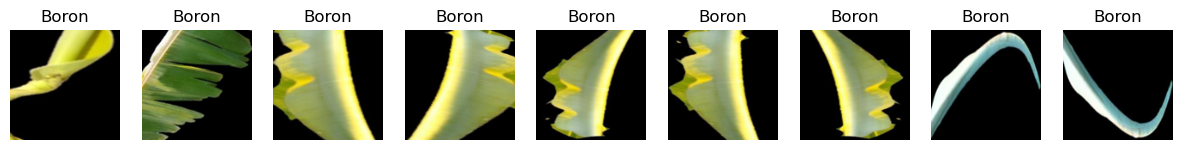

In [70]:
# Function to display some images with their labels
def display_images_with_labels(images, labels, num_samples=9):
    plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
    for i in range(min(num_samples, len(images))):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Display some images and their labels
display_images_with_labels(train_images_np, train_labels_np, num_samples=9)

IMAGE NORMALIZATION

In [72]:
# Normalize the images to the range of [0, 1]

train_images_np = train_images_np / 255.0
print("Images normalized")

Images normalized


DATA AUGUMENTATION

Data augmentation is a technique used to increase the diversity of your training data by applying random transformations to the images, such as rotations, flips, and zooms.
after doing that will add the number of image dataset

In [74]:
# We can use ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [75]:
# Apply data augumentation to the training images
data_generator.fit(train_images_np)

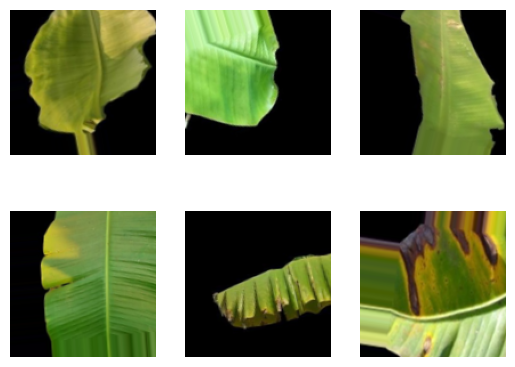

In [76]:
# Visualize the augumented images
augumented_images = next(data_generator.flow(
    train_images_np,
    train_labels_np,
    batch_size = 6
))

for i in range (6):
    plt.subplot(2, 3, i+1)
    plt.imshow(augumented_images[0][i])
    # plt.title(labels[i])
    plt.axis('off')
plt.show()

In [77]:
print(f"Resized images shape: {train_images_np.shape}")
print(f"Labels shape: {train_labels_np.shape}")

Resized images shape: (7500, 128, 128, 3)
Labels shape: (7500,)


MODELING bUILDING

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'), MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'), MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'), MaxPooling2D((2, 2)),
    
    Flatten(), #convert a multi-dimensional tensor into a one-dimensional tensor
    Dense(128, activation='relu'),#connects every neuron in the layer to every neuron in the previous layer.
    Dense(10, activation='softmax')  # Number of classes in your dataset
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy',   metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,569,482 (5.99 MB)

 Trainable params: 1,569,482 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

COMPILING THE MODEL

In [81]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    # optimizer='adam',              # Optimizer (e.g., Adam, SGD, RMSprop)
    loss='sparse_categorical_crossentropy',  # Loss function (e.g., categorical crossentropy, mean squared error)
    metrics=['accuracy']          # Metrics to evaluate (e.g., accuracy, precision)
)

TRAINING THE MODEL

In [83]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train_images_np, train_labels_np, test_size=0.2, random_state=42)

In [84]:
# Checking the ldata type of data
print("Training data type: ", x_train.dtype, y_train.dtype)
print("Validation data type: ", x_validation.dtype, y_validation.dtype)

Training data type:  float64 <U9
Validation data type:  float64 <U9


In [85]:
# Cheking the shape of data
print("Shape ot Training data", x_train.shape, y_train.shape)
print("Shape ot Validation data", x_validation.shape, y_validation.shape)

Shape ot Training data (6000, 128, 128, 3) (6000,)
Shape ot Validation data (1500, 128, 128, 3) (1500,)


In [86]:
if y_train.ndim == 1 and not np.issubdtype(y_train.dtype, np.integer):
    # Encode labels if they are not integers
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_validation = label_encoder.transform(y_validation)


In [87]:
# Check if GPU is available and being used
physical_devices = tf.config.list_physical_devices('GPU')

batch_size = 100  # Adjust based on available memory
steps_per_epoch = len(x_train) // batch_size

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    data_generator.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=5,  # You can start with more epochs since early stopping is in place
    validation_data=(x_validation, y_validation),
    callbacks=[early_stopping]  # Add early stopping callback
)


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.1848 - loss: 2.1377 - val_accuracy: 0.3180 - val_loss: 1.8826
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3180 - val_loss: 1.8826
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.3146 - loss: 1.8524 - val_accuracy: 0.3420 - val_loss: 1.8096
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3420 - val_loss: 1.8096
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.3285 - loss: 1.8033 - val_accuracy: 0.3740 - val_loss: 1.7062


EVALUATING THE MODEL

In [89]:
# Access training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]

# Print out the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")


Training Accuracy: 0.3408
Validation Accuracy: 0.3740


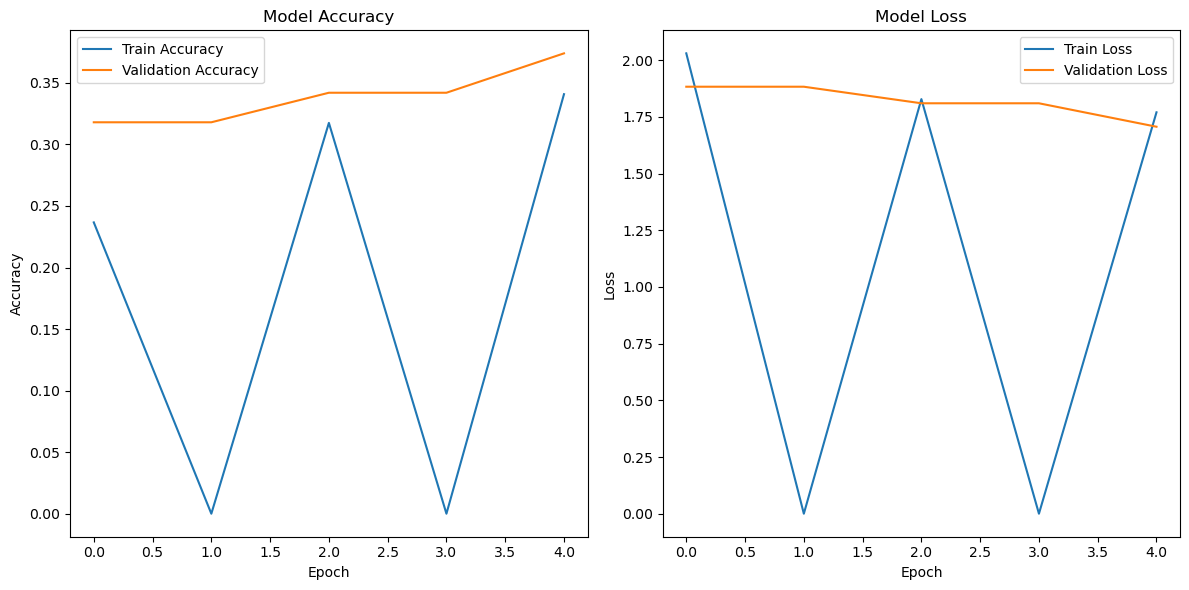

In [90]:
# Plot training & validation metrics
plt.figure(figsize=(12, 6))  # Adjust the size as needed

# Plot training & validation accuracy
plt.subplot(1, 2, 1)  # Change to (1, 2, 1) since there are only 2 plots now
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)  # Change to (1, 2, 2) for the second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [115]:
# import pickle
# from tensorflow.keras.models import load_model

# model.save('nutrient.h5')

# # Load your pre-trained model at startup
# model = load_model('nutrient.h5')
# # Assuming `model` is your trained model
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Example model architecture
# model = Sequential([
    # Flatten(input_shape=(224, 224, 3)),
    # Dense(128, activation='relu'),
    # Dense(4, activation='softmax')  # Assuming 4 classes
# ])

# Compile the model
# model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

# Save the model using the .keras format
model.save('nutrient.keras')

# Load the model
loaded_model = tf.keras.models.load_model('nutrient.keras')

# Optional: Recompile the loaded model if you need to train or evaluate it further
# loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
